# Documentation - Test Results

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
dt = pd.read_csv("Outputs/decision_tree_results.csv")
knn = pd.read_csv("Outputs/knn_results.csv")
logr = pd.read_csv("Outputs/logistic_regression_results.csv")
svm = pd.read_csv("Outputs/svm_results.csv")

In [28]:
models = {'dt': dt, 'knn': knn, 'logr': logr, 'svm': svm}

# Concatenate all DataFrames into one DataFrame and add a column for model names
all_models = pd.concat([model.assign(model_name=name) for name, model in models.items()], ignore_index=True)

# Extract relevant columns for comparison
metrics_columns = ['test_Accuracy', 'test_Precision', 'test_Recall', 'test_F1 Score', 'test_AUC']

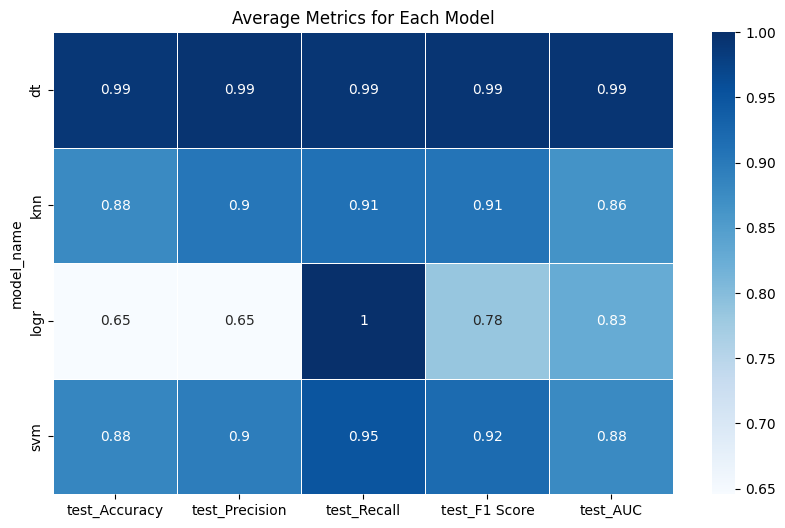

In [30]:
# Calculate the average of each metric for each model
average_metrics = all_models.groupby('model_name')[metrics_columns].mean().reset_index()

# Set the model name as the index
average_metrics.set_index('model_name', inplace=True)

# Create a heatmap to visualize the averages
plt.figure(figsize=(10, 6))
sns.heatmap(average_metrics, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Average Metrics for Each Model')
plt.show()

In [31]:
average_metrics

,test_Accuracy,test_Precision,test_Recall,test_F1 Score,test_AUC
model_name,,,,,
dt,0.989773,0.993557,0.990597,0.991994,0.992019
knn,0.877414,0.904207,0.910555,0.907171,0.864642
logr,0.645697,0.645697,1.000000,0.784603,0.828236
svm,0.882518,0.896145,0.949023,0.918828,0.878080


### Decision Tree:
- **Analysis**: The decision tree model has performed exceptionally well across all metrics, indicating it is highly effective at distinguishing between classes. The high precision, recall, and F1 score suggest that it is both precise and robust in identifying true positives, with very few false positives and false negatives. The AUC close to 1 implies that the model has excellent overall discriminatory ability.

- **Recommendations**: Given its strong performance, the decision tree model can be considered a reliable choice for this classification task. However, decision trees can be prone to overfitting, so it's advisable to check for overfitting and possibly prune the tree or use ensemble methods like Random Forests or Gradient Boosting to enhance robustness.

### KNN (K-Nearest Neighbors):
- **Analysis**: The KNN model shows good performance with high precision and recall, leading to a strong F1 score. This indicates that it is effective in predicting the correct classes with a good balance between precision and recall. However, the AUC is slightly lower, suggesting that there might be some room for improvement in its ability to discriminate between classes.

- **Recommendations**: KNN performance can be influenced by the choice of k and the distance metric. Experimenting with different values of k and using cross-validation to find the optimal k might improve results. Additionally, feature scaling and selecting relevant features can enhance performance.

### Logistic Regression:
- **Analysis**: Logistic regression has a perfect recall, meaning it identified all true positives, but its precision and accuracy are significantly lower. This imbalance results in a moderate F1 score and AUC. The high recall and lower precision indicate that while the model is sensitive, it also produces many false positives.

- **Recommendations**: To improve precision, regularization techniques like L1 (Lasso) or L2 (Ridge) regularization can be applied. Balancing the dataset, if it's imbalanced, might also help. Fine-tuning the decision threshold used for classification can also improve the trade-off between precision and recall.

### SVM (Support Vector Machine):
- **Analysis**: The SVM model shows strong performance with high recall and a good balance in precision, resulting in a high F1 score. The AUC indicates that the model has good discriminatory ability, slightly better than KNN but not as high as the decision tree.

- **Recommendations**: SVM performance can often be improved by fine-tuning the kernel and its parameters (such as C and gamma for an RBF kernel). Trying different kernels (linear, polynomial, RBF) and using grid search with cross-validation to optimize hyperparameters could lead to better results. Additionally, ensuring that the features are properly scaled is crucial for SVMs.
